In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

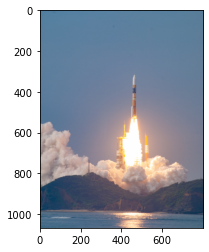

In [6]:
rocket_org = Image.open('H2A.jpg')
plt.imshow(rocket_org)

In [7]:
rocket_org_array = np.array(rocket_org)

In [9]:
rocket_org.width

800

In [10]:
rocket_org.height

1067

In [11]:
rocket_org.size

(800, 1067)

In [12]:
# 土台の作成
rocket2 = Image.new("RGB", (rocket_org.width * 2, rocket_org.height))

rocket2.paste(rocket_org, (0, 0))
rocket2.paste(rocket_org, (rocket_org.width, 0))

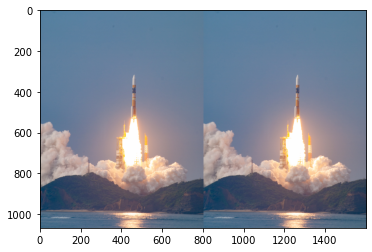

In [13]:
plt.imshow(rocket2)

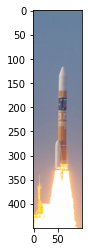

In [14]:
rocket_crop = rocket_org.crop((400, 200, 500, 650))
plt.imshow(rocket_crop)

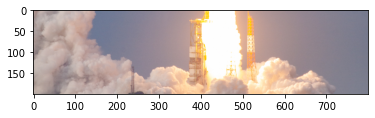

In [18]:
# 画像を縦4枚に分割
rocket_crop_list = []
for i in range(4):
    rocket_crop_list.append(rocket_org.crop((0, 200 * i, rocket_org.width, 200 * (i + 1))))

plt.imshow(rocket_crop_list[3])

In [23]:
# 分割した画像をGIFアニメーションとして保存
rocket_crop_list[0].save("rocket_anim.gif",
                        save_all=True,
                        append_images=rocket_crop_list[1:4],
                        loop=0,
                        duration=100)

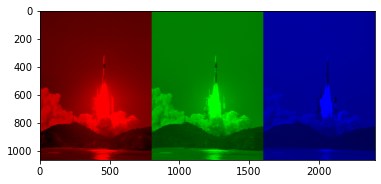

In [25]:
# 赤のみの単色化
rocket_r = np.zeros((rocket_org.height, rocket_org.width, 3), dtype=np.uint8)
rocket_r[:, :, 0] = rocket_org_array[:, :, 0]

# 緑のみの単色化
rocket_g = np.zeros((rocket_org.height, rocket_org.width, 3), dtype=np.uint8)
rocket_g[:, :, 1] = rocket_org_array[:, :, 1]

# 青のみの単色化
rocket_b = np.zeros((rocket_org.height, rocket_org.width, 3), dtype=np.uint8)
rocket_b[:, :, 2] = rocket_org_array[:, :, 2]

# 単色化した画像を横に並べて表示
rocket_monos = Image.new("RGB", (rocket_org.width * 3, rocket_org.height))
rocket_monos.paste(Image.fromarray(rocket_r), (0, 0))
rocket_monos.paste(Image.fromarray(rocket_g), (rocket_org.width, 0))
rocket_monos.paste(Image.fromarray(rocket_b), (rocket_org.width * 2, 0))
plt.imshow(rocket_monos)

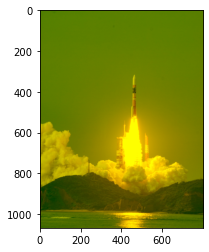

In [26]:
# 青だけ抜いた（赤と緑のみの）画像に加工
rocket_rg = np.zeros((rocket_org.height, rocket_org.width, 3), dtype=np.uint8)
rocket_rg[:, :, 0] = rocket_org_array[:, :, 0]
rocket_rg[:, :, 1] = rocket_org_array[:, :, 1]
plt.imshow(rocket_rg)

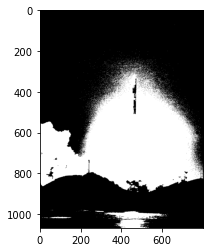

In [27]:
rocket_gr_array = np.array(rocket_org.convert("L"))
rocket_wb1 = rocket_gr_array // 128
plt.imshow(rocket_wb1, cmap="gray")

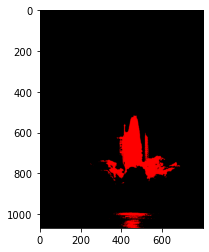

In [28]:
rocket_r_trimmed = np.copy(rocket_r)

rocket_r_wb = rocket_r_trimmed[:, :, 0] // 240

rocket_r_trimmed[:, :, 0] *= rocket_r_wb

plt.imshow(rocket_r_trimmed)

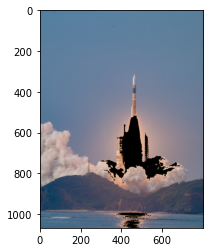

In [30]:
# 土台
rocket_base = Image.new("RGB", (rocket_org.width, rocket_org.height))

# マスキング用のデータ
rocket_r_trimmed_img = Image.fromarray(rocket_r_trimmed[:, :, 0]).convert("L")

# マスク処理を実行して結果を表示
rocket_masked = Image.composite(rocket_base, rocket_org, rocket_r_trimmed_img)
plt.imshow(rocket_masked)

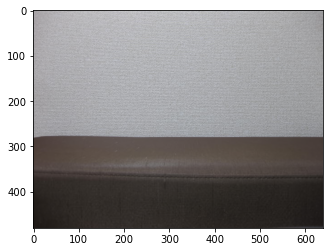

In [31]:
im1 = Image.open("home1.png")
plt.imshow(im1)

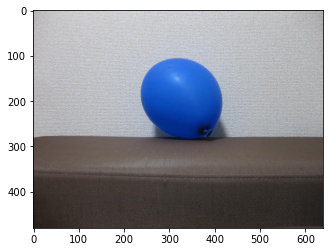

In [32]:
im2 = Image.open("home2.png")
plt.imshow(im2)

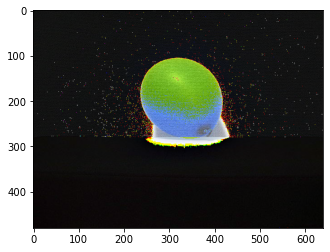

In [33]:
# ndarray化
im1a = np.array(im1)
im2a = np.array(im2)

# 2つの配列を引き算した結果を表示
im2a -= im1a
plt.imshow(im2a)

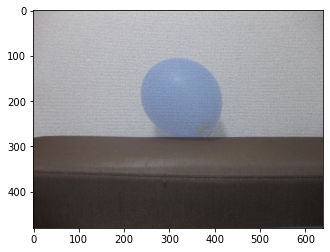

In [34]:
im3 = Image.blend(im1, im2, 0.3)
plt.imshow(im3)